In [152]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.image as mpimg

In [119]:
meta_data= pd.read_csv('metadata.csv')
tumor_img= 'Cancer'
healthy_img='Not Cancer'

In [44]:
tumor_img

'/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor'

In [24]:
meta_data.shape , meta_data.head()

((4600, 6),
    Unnamed: 0            image  class format mode          shape
 0           0   Cancer (1).jpg  tumor   JPEG  RGB  (512, 512, 3)
 1           1   Cancer (1).png  tumor    PNG    L     (300, 240)
 2           2   Cancer (1).tif  tumor   TIFF  RGB  (256, 256, 3)
 3           3  Cancer (10).jpg  tumor   JPEG  RGB  (512, 512, 3)
 4           4  Cancer (10).tif  tumor   TIFF  RGB  (256, 256, 3))

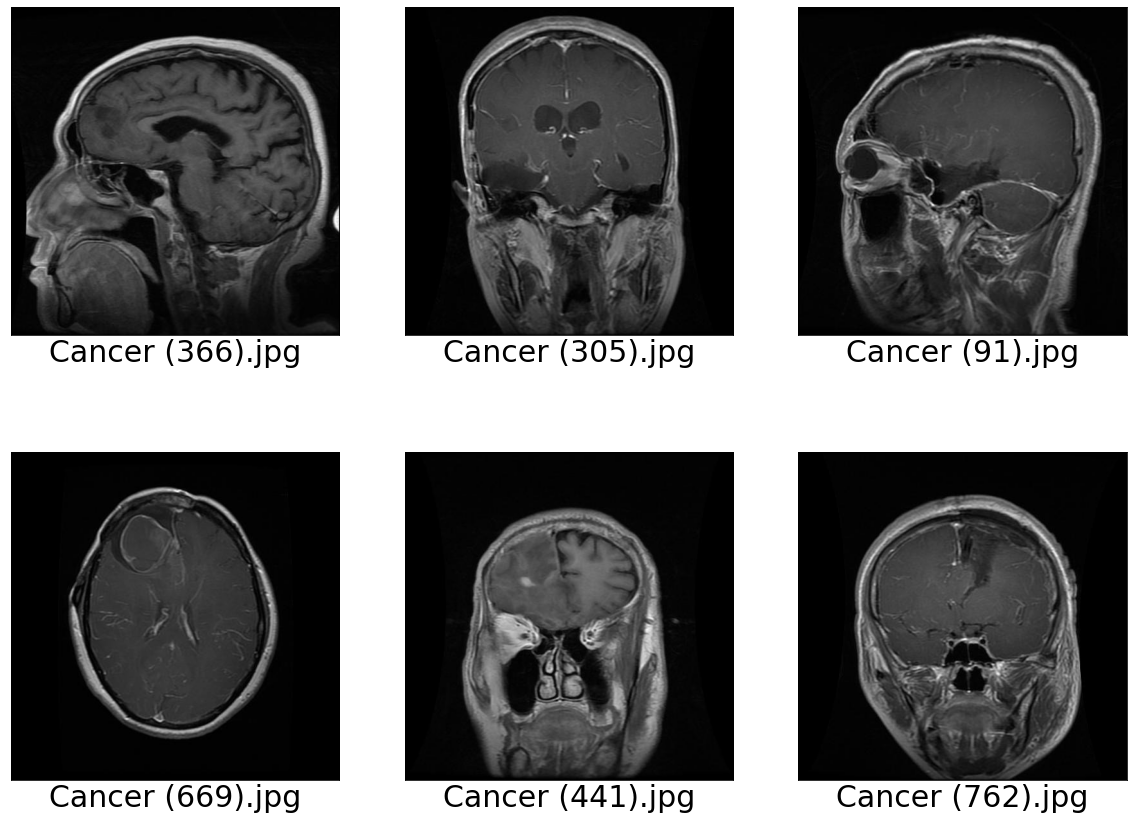

In [146]:
import random
fig= plt.figure(figsize=(20,15))
plt.title("TUMOR")

fig.patch.set_facecolor('white')

for i in range(1,7):
    plt.subplot(2,3,i)
    num= random.randint(1,1000)
    img=mpimg.imread(tumor_img + ' (' + str(num) + ').jpg')
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('Cancer ('+str(num)+').jpg',fontsize=30)
plt.show()

Preprocessing 

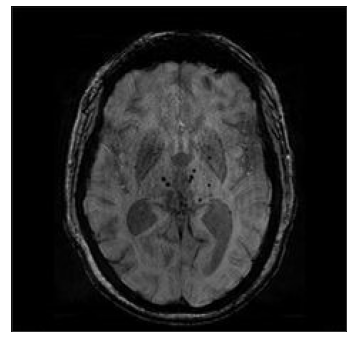

In [155]:
health= healthy_img + "  (122).jpg"
img1 = mpimg.imread(health,0)
fig = plt.figure(figsize=(6,6))
fig.patch.set_facecolor('white')
plt.xticks([])
plt.yticks([])
plt.imshow(img1)


In [164]:
#grayscale 
def grayscale(rgb):
    if rgb.ndim == 3:
        R, G, B = rgb[:, :, 0], rgb[:, :, 1], rgb[:, :, 2]
        output = 0.2989 * R + 0.5870 * G + 0.1140 * B
    else:
       output = rgb
    if output.max() < 1.1:
        output = output * 255
    return output

In [172]:
img2=grayscale(img1)
print(img2.shape)

(228, 235)


In [193]:
#Noise reduction 
def noise_reduction(img):
    clean=np.array(img)
    clean[img < 10] = 0
    return clean

In [194]:
img3=noise_reduction(img2)
img2[:6,:6]

array([[109.989 ,  31.9968,  33.9966,  36.9963,  35.9964,  34.9965],
       [ 77.9922,   0.    ,   1.9998,   4.9995,   2.9997,   2.9997],
       [ 76.9923,   0.    ,   0.    ,   2.9997,   0.9999,   0.    ],
       [ 81.9918,   3.9996,   4.9995,   6.9993,   3.9996,   3.9996],
       [ 78.9921,   0.    ,   0.    ,   1.9998,   0.    ,   0.    ],
       [ 80.9919,   1.9998,   0.9999,   2.9997,   0.    ,   0.    ]])

In [195]:
img3[:6,:6]

array([[109.989 ,  31.9968,  33.9966,  36.9963,  35.9964,  34.9965],
       [ 77.9922,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ],
       [ 76.9923,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ],
       [ 81.9918,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ],
       [ 78.9921,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ],
       [ 80.9919,   0.    ,   0.    ,   0.    ,   0.    ,   0.    ]])

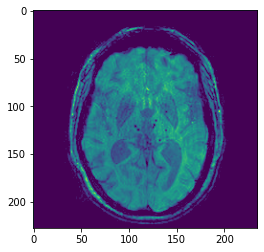

In [196]:
plt.imshow(img3)

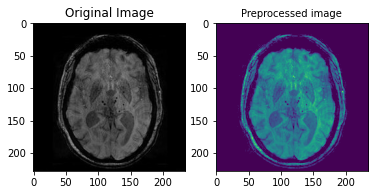

In [197]:
#comparison 
fig= plt.figure(figsize=(6,6))
plt.subplot(1,2,1)
plt.imshow(img1)
plt.title("Original Image")
plt.subplot(1,2,2)
plt.imshow(img3)
plt.title("Preprocessed image", fontsize=10)
plt.show()

In [199]:
#applying preprocessing features to entire dataset

def preprocessing(img):
    output=grayscale(img)
    output=noise_reduction(img)
    return output

